In [177]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
from datetime import datetime, timedelta
from fbprophet import Prophet

In [178]:
# We want to simulate yesterday's stock market data
d = datetime.today() - timedelta(days=1)
day_to_simulate = d.strftime('%Y-%m-%d')
day_to_simulate

'2020-05-12'

In [179]:
api_key = 'B0N8Q38MJAVBSLOY'

In [180]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='FB', interval = '1min', outputsize = 'full')

In [181]:
data = data.reset_index()

In [182]:
data_prophet = data[["date","1. open"]]
data_prophet.columns = ["ds", "y"]

In [183]:
# Use to reverse dataframe
data_prophet = data_prophet.iloc[::-1]
data_prophet = data_prophet.reset_index(drop = True)

In [184]:
data_prophet['string_ds'] = data_prophet['ds'].astype(str)

In [185]:
data_prophet

,ds,y,string_ds
0,2020-05-07 09:31:00,211.1169,2020-05-07 09:31:00
1,2020-05-07 09:34:00,211.1300,2020-05-07 09:34:00
2,2020-05-07 09:35:00,211.3000,2020-05-07 09:35:00
3,2020-05-07 09:36:00,210.6300,2020-05-07 09:36:00
4,2020-05-07 09:37:00,210.5200,2020-05-07 09:37:00
...,...,...,...
1933,2020-05-13 15:56:00,204.9900,2020-05-13 15:56:00
1934,2020-05-13 15:57:00,204.7100,2020-05-13 15:57:00
1935,2020-05-13 15:58:00,204.6800,2020-05-13 15:58:00
1936,2020-05-13 15:59:00,204.7400,2020-05-13 15:59:00


In [186]:
# Only consider one day of data
data_prophet = data_prophet[data_prophet.string_ds.str.startswith((day_to_simulate))]

In [187]:
data_prophet = data_prophet.drop(['string_ds'], axis = 1)

In [188]:
data_prophet = data_prophet.reset_index(drop=True)

In [195]:
current_time = data_prophet['ds'].iloc[388]
current_price = data_prophet['y'].iloc[388]

In [189]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods=1, freq = 'min', include_history = False)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/user/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [190]:
# predict price the next minute
forecast = m.predict(future)
float(forecast['yhat'])

210.85183696533963

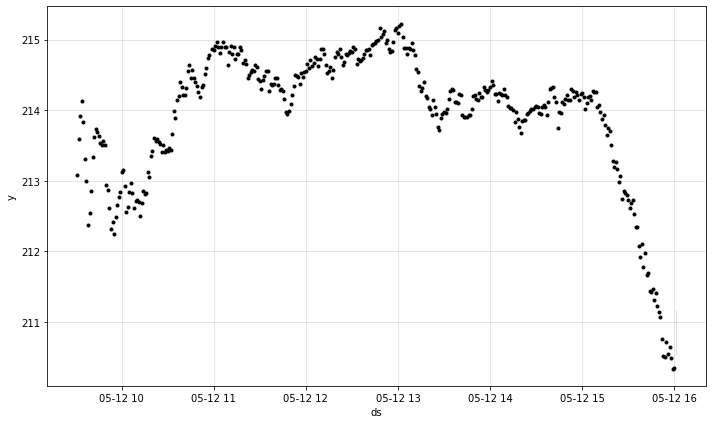

In [191]:
fig1 = m.plot(forecast)